In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os

pwd = os.getcwd()
tfrecord_file_path = pwd + "/*.tfrecord"
filename_queue = tf.train.string_input_producer(
                              tf.train.match_filenames_once(tfrecord_file_path),
                              shuffle=True, num_epochs=None)

reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)
features = tf.parse_single_example(serialized_example,
                                       features={'data': tf.FixedLenFeature([311], tf.float32)})  
fft_batch = tf.train.shuffle_batch([features['data']],batch_size=10,num_threads=1,capacity=150,min_after_dequeue=10)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Restoring parameters from model/fft


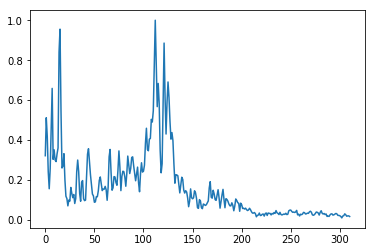

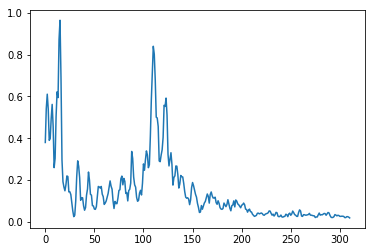

2.58166


In [2]:
with tf.Session() as sess:  
    
    tf.local_variables_initializer().run()
    tf.global_variables_initializer().run()
    
    coord = tf.train.Coordinator()
    thread = tf.train.start_queue_runners(sess=sess,coord=coord)
    
    saver = tf.train.import_meta_graph('model/fft.meta')
    saver.restore(sess,'model/fft')  
    y = tf.get_collection('output_y')[0]
    l = tf.get_collection('output_y')[1]
    
    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name("input_x:0")
    
    inputdata,outputdata,loss = sess.run([fft_batch,y,l],feed_dict ={x:fft_batch.eval()})
    
    plt.plot(inputdata[0])
    plt.show()
    
    plt.plot(outputdata[0])
    plt.show()
    
    print (loss)
    
    coord.request_stop()
    coord.join(thread)